# Breast Cancer Research by Siddharth Bhattacharya

### Data Collection and Sorting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Siddharth\Deep Learning\Breast Cancer Stuff\Info.txt", sep=" ").drop('Unnamed: 7',axis=1)
df

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [25]:
def classify_type(a):
    if a=="NORM": return 0
    elif a == "CIRC": return 1
    elif a == "CALC": return 2
    elif a == "SPIC": return 3
    elif a == "MISC": return 4
    elif a == "ARCH": return 5
    elif a == "ASYM": return 6
    
def classify_tissue(a):
    if a=="F": return 0
    elif a == "G": return 1
    elif a == "D": return 2
    
def classify_Severity(a):
    if a == "M":return 0
    elif a == "B":return 1
    else: return 2

In [26]:
df["CANCER"] = [0 if x == 'NORM' else 1 for x in df['CLASS']]

In [27]:
df['CLASS'] = [classify_type(x) for x in df['CLASS']]

In [28]:
df['BG'] = [classify_tissue(x) for x in df['BG']]

In [29]:
df['SEVERITY'] = [classify_Severity(x) for x in df['SEVERITY']]

In [3]:
labels_Cdet  = df.drop_duplicates(subset=['REFNUM'])['CANCER']
labels_Ctype = df.drop_duplicates(subset=['REFNUM'])['CLASS']
labels_Cbg   = df.drop_duplicates(subset=['REFNUM'])['BG']
labels_Csv   = df.drop_duplicates(subset=['REFNUM'])['SEVERITY']

KeyError: 'CANCER'

In [4]:
sns.countplot(x='CANCER',data = df);

ValueError: Could not interpret input 'CANCER'

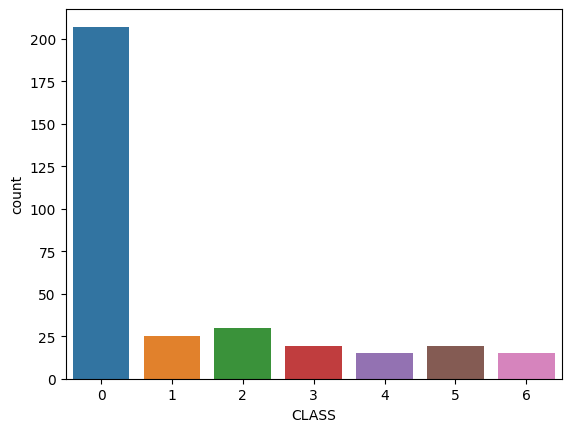

In [32]:
sns.countplot(x='CLASS',data = df);

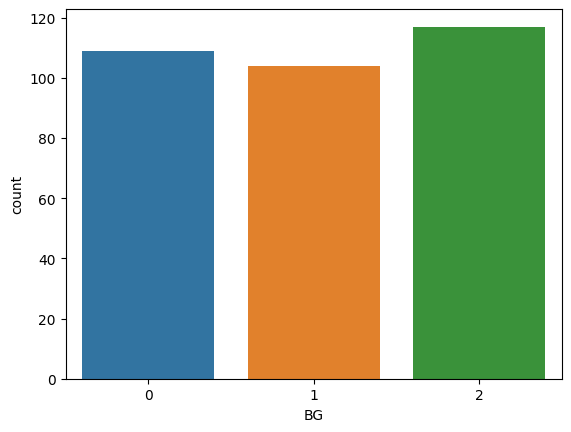

In [33]:
sns.countplot(x='BG',data = df);

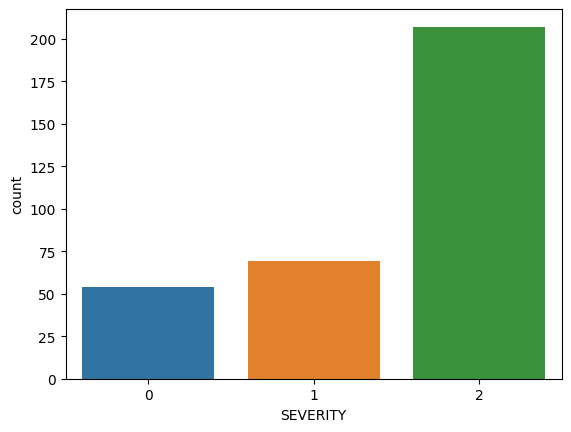

In [34]:
sns.countplot(x='SEVERITY',data = df);

In [35]:
import os
import shutil


mypath = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\all-mias'

path_BG_0= r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty'
path_BG_1= r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular'
path_BG_2= r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular'

path_Class_0 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal'
path_Class_1 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer'

path_Type_0 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal'
path_Type_1 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Circuscribed Mass'
path_Type_2 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification'
path_Type_3 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Spiculated Mass'
path_Type_5 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Architectural distortion'
path_Type_4 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Ill defined Mass'
path_Type_6 = r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Asymmetry'

path_Severity_0 = r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Malignant"
path_Severity_1 = r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn"
path_Severity_2 = r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass"


In [37]:
# Classifying the Dataset into different folders.
def seperation_bg(a):
    if a == 0:return path_BG_0
    if a == 1:return path_BG_1
    if a == 2:return path_BG_2
    
def seperation_cl(a):
    if a == 0:return path_Class_0
    if a == 1:return path_Class_1

def seperation_ty(a):
    if a == 0:return path_Type_0
    if a == 1:return path_Type_1
    if a == 2:return path_Type_2
    if a == 3:return path_Type_3
    if a == 4:return path_Type_4
    if a == 5:return path_Type_5
    if a == 6:return path_Type_6

def seperation_sv(a):
    if a == 0:return path_Severity_0
    if a == 1:return path_Severity_1
    if a == 2:return path_Severity_2
  
for files in os.listdir(mypath):
    text = files.split('.')[0]
    print(text)
    tup = df.index[df['REFNUM']==text].tolist()
    row = tup[0]
    num_1 = df.loc[row].at["BG"]
    num_2 = df.loc[row].at["CANCER"]
    num_3 = df.loc[row].at["CLASS"]
    num_4 = df.loc[row].at["SEVERITY"]
    print(num_1,num_2,num_3)
    src = mypath + "\\" + files
    print(seperation_bg(num_1))
    print(seperation_cl(num_2))
    print(seperation_ty(num_3))
    print(seperation_sv(num_4))
    shutil.copy2(src,seperation_bg(num_1))
    shutil.copy2(src,seperation_cl(num_2))
    shutil.copy2(src,seperation_ty(num_3))
    shutil.copy2(src,seperation_sv(num_4))

    

mdb001
1 1 1
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Circuscribed Mass
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn
mdb002
1 1 1
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Circuscribed Mass
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn
mdb003
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_Data

mdb032
1 1 4
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Ill defined Mass
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn
mdb033
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb034
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classifi

mdb063
2 1 4
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Ill defined Mass
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn
mdb064
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb065
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classifi

mdb094
1 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb095
0 1 6
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Asymmetry
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Malignant
mdb096
0 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mas

mdb121
1 1 5
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Architectural distortion
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn
mdb122
1 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb123
1 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\

mdb146
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb147
0 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb148
0 1 3
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Spiculated Mass
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Ma

mdb172
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb173
0 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb174
0 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb

mdb212
1 1 2
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn
mdb213
1 1 2
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Malignant
mdb214
1 1 2
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification
C:\Users\Siddharth\Desktop\Mammography_Dat

mdb237
0 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb238
0 1 2
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Malignant
mdb239
2 1 2
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Seve

mdb282
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb283
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass
mdb284
2 0 0
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal
C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_

In [45]:
# pgm TO jpg conversion

import os
from PIL import Image

os.chdir(r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\No Mass")

for file in os.listdir(path_Severity_2):
    filename, extension  = os.path.splitext(file)
    if extension == ".pgm":
        new_file = "{}.png".format(filename)
        with Image.open(file) as im:
            im.save(new_file)
        im.close()
        os.remove(file)
        